In [20]:
# Version 1, for counting green space pixels of 1 plant

In [1]:
# only needed in Jupyter Lab to see the images inline
%matplotlib widget

from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt

print("PlantCV Version:", pcv.__version__)

PlantCV Version: 4.9


In [2]:
# Input/output options
args = WorkflowInputs(
    images=["/Users/maxwellrosen/Storage/Salk_Plant_Imaging/eckerlabproj/Jupyter_Lab/Max_Work/test_image.jpg"],
    names="image1",
    result="example_results.json",
    outdir=".",
    writeimg=False,
    debug="plot"
    )

In [3]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 10
pcv.params.text_thickness = 20

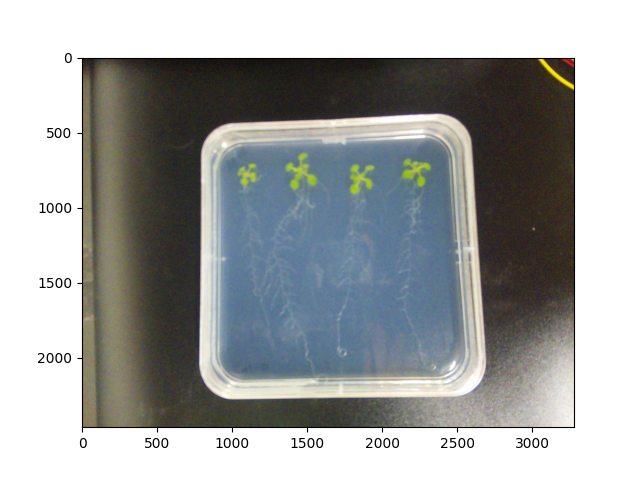

In [4]:
# Shows your image, defines it as "img"
img, path, filename = pcv.readimage(filename=args.image1)

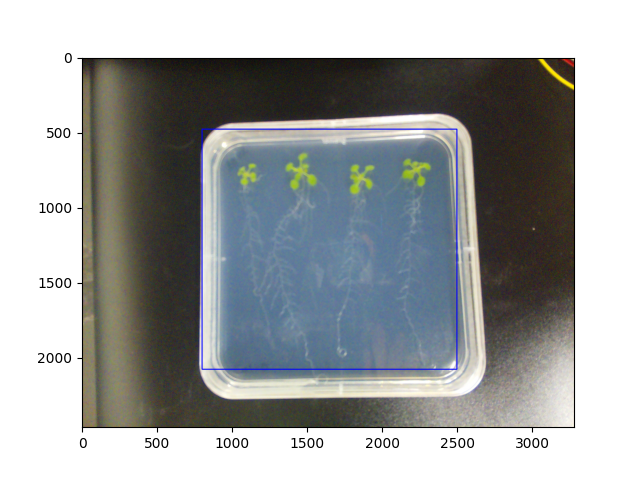

In [5]:
# Crops your image
crop_img = pcv.crop(img=img, x=800, y=480, h=1600, w=1700)

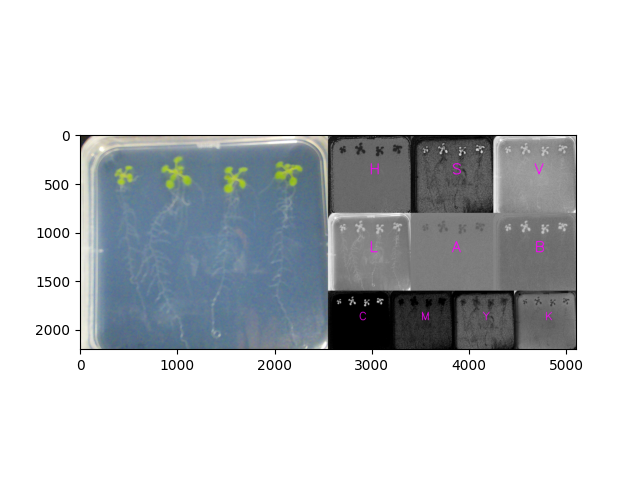

In [6]:
# Shows options for which channel to view the image through (ideally want the most contrast)
colorspace_img = pcv.visualize.colorspaces(rgb_img=crop_img)

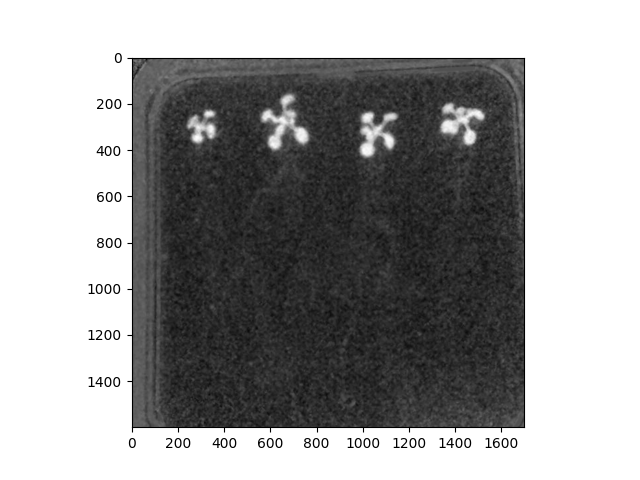

In [19]:
# Actually picks a channel with rgb2gray_"lab" and then the channel is the letter from "lab" that you look through
b_img = pcv.rgb2gray_lab(rgb_img=crop_img, channel='b')

In [8]:
# Visualization only, not needed for analysis
hist_figure1, hist_data1 = pcv.visualize.histogram(img = b_img, hist_data=True)

alt.Chart(...)

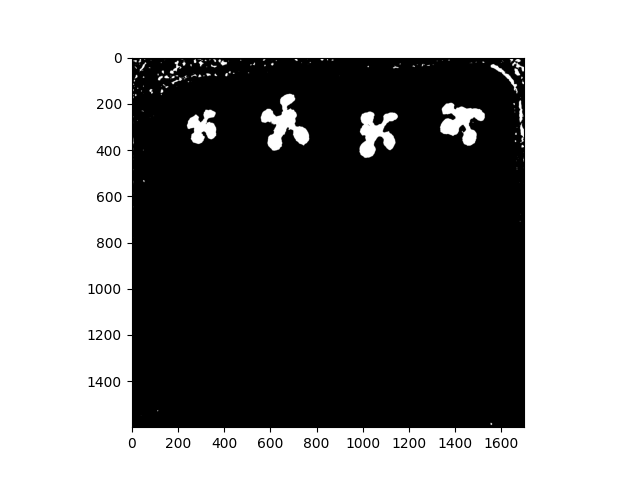

In [9]:
# Masks the image
thresh_mask = pcv.threshold.binary(gray_img=b_img, threshold=140, object_type='light')

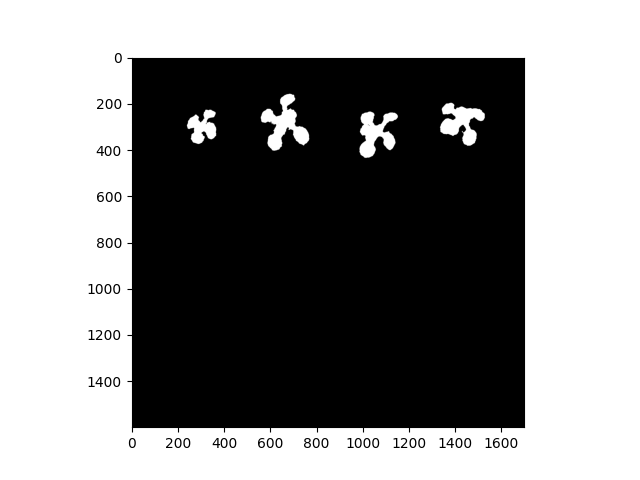

In [10]:
# Deletes groups of pixels less than the pixel size (weird dots around edges not plant is unmasked)
fill_mask = pcv.fill(bin_img=thresh_mask, size=3000)

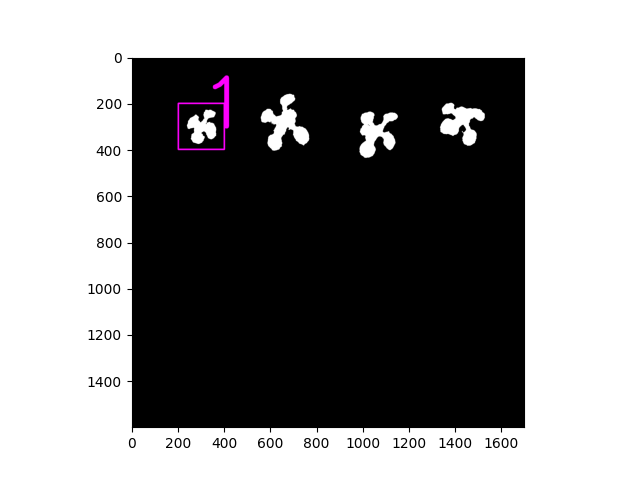

In [11]:
# Defines Region of Interest (ROI)
roi = pcv.roi.rectangle(img=fill_mask, x=200, y=200, h=200, w=200)

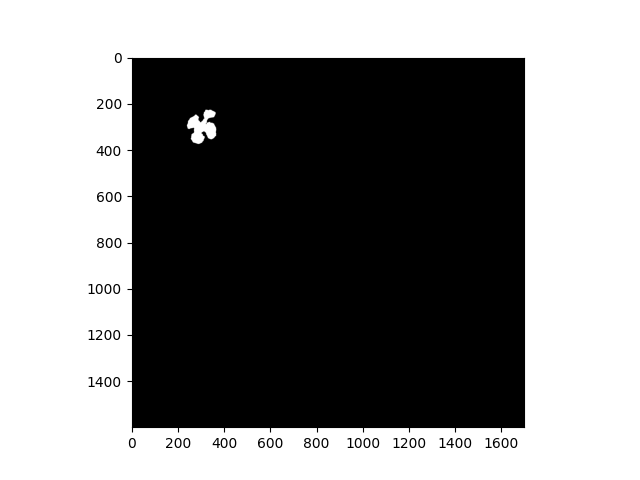

In [12]:
# Makes a new mask only with plant inside ROI
kept_mask  = pcv.roi.quick_filter(mask=fill_mask, roi=roi)

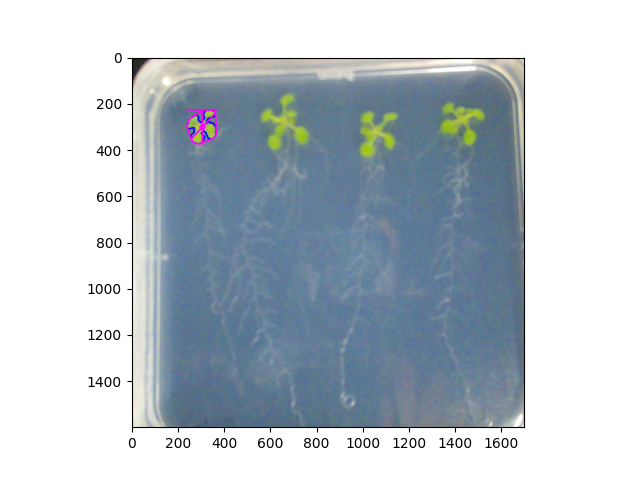

In [13]:
# Outputs analyzed image
analysis_image = pcv.analyze.size(img=crop_img, labeled_mask=kept_mask)

In [14]:
# Makes histogram of colors inside ROI
color_histogram = pcv.analyze.color(rgb_img=crop_img, labeled_mask=kept_mask, colorspaces='all', label="default")

alt.FacetChart(...)

In [15]:
# Saves results for the 1 image (running again overwites past results)
pcv.outputs.save_results(filename= args.result)

In [16]:
# Prints how many pixels were counted
pixels_value = pcv.outputs.observations["default_1"]["area"]["value"]
pixels_label = pcv.outputs.observations["default_1"]["area"]["label"]

print("Number of pixels:", pixels_value, pixels_label)

Number of pixels: 11077.0 pixels


In [17]:
plt.close('all')